In [1]:
import constants as co
from analyzers import analyze_classifier, analyze_regressor, get_model_predictions
from auxiliary import loggers

from pathlib import Path
import sys

import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import os

import pickle
import json
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
random_seed = 42

%config Completer.use_jedi = False

l = loggers.get_logger(logger_name="logger")

METHOD_PREFIX = "rf"
RESULT_FILE_REGRESSOR = "result_regressor_rf.csv"
RESULT_FILE_CLASSIFIER = "result_classifier_rf.csv"

In [2]:
l.info(os.environ['CONDA_DEFAULT_ENV'])

2023-01-29 15:39:08,302 - logger - INFO - rorgammaqsar


In [3]:
external_data = pd.read_parquet(co.DATA_DIR_CANDIDATES/"search_space_ror_gamma_all_active_found_species_filtered_.parquet")
external_smiles = external_data["smiles_from_target_id"]
external_data.shape

(1673, 6)

In [4]:
external_data.head()

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl
178,2423,14273019,0.750000,JKBB.fpb,COc1cc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)ccc1NC(=O)c1ccccc1Cl,CHEMBL4784120
184,664,410046164,0.733333,JKAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccccc2-c2ccc(-c3ccccc3)cc2)cc1,CHEMBL3609389
863,357,519399935,0.736842,JKAD.fpb,COCCc1ccc(Oc2ccc(NS(=O)(=O)c3ccc4c5c(cccc35)C(=O)N4)cc2)cc1,CHEMBL3234246
1132,299,476865727,0.719298,JKAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2nc(Cc3ccccc3)c(-c3ccccc3)s2)cc1,CHEMBL3105804
1207,270,626626267,0.750000,JKAD.fpb,CC(=O)Nc1ccc(CC(=O)Nc2nc(-c3ccccc3)c(C(=O)c3ccccc3)s2)cc1,CHEMBL3105674


In [6]:
X_val, y_train_val, y_train_val_pred, X_train, y_train, y_train_pred, X_ext, y_reg = get_model_predictions(co.TRAINING_CONF_DIR/"median_100"/"svm_regression_Morgan_1024_pca_128_QED.json", smiles_codes_ext=external_smiles)
y_reg.name = "pred_reg"
y_reg.head()

2023-01-29 15:40:18,328 - logger - INFO - Scaler constructor...
2023-01-29 15:40:18,328 - logger - INFO - PCA constructor...
2023-01-29 15:40:18,334 - logger - INFO - Scaler constructor...
2023-01-29 15:40:18,335 - logger - INFO - PCA constructor...
2023-01-29 15:40:18,335 - logger - INFO - Optimal hyperparameters:, {'C': 2.4825430099517085, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'epsilon': 0.1311194468831029, 'shrinking': False, 'tol': 0.001, 'verbose': False}
2023-01-29 15:40:18,336 - logger - INFO - CreateFPS fit...
2023-01-29 15:40:18,336 - logger - INFO - CreateFPS transform...
100%|██████████| 2005/2005 [00:04<00:00, 419.63it/s]
2023-01-29 15:40:26,550 - logger - INFO - Scaler fit...
2023-01-29 15:40:26,557 - logger - INFO - Scaler transform...
2023-01-29 15:40:26,569 - logger - INFO - Scaler fit...
2023-01-29 15:40:26,780 - logger - INFO - CreateFPS fit...
2023-01-29 15:40:26,780 - logger - INFO - CreateFPS transform...
1

178     5.835433
184     7.276806
863     4.967100
1132    6.489349
1207    5.612848
Name: pred_reg, dtype: float64

In [ ]:
X_val, y_train_val, y_train_val_pred, X_train, y_train, y_train_pred, X_ext, y_reg = get_model_predictions(co.TRAINING_CONF_DIR/"median_100"/"svm_regression_Morgan_1024_pca_128_QED.json", smiles_codes_ext=external_smiles)
y_reg.name = "pred_reg"
y_reg.head()

In [ ]:
y_train.hist(bins=30)
plt.title("Distribution of pIC50 values")

In [7]:
X_val, y_train_val, y_train_val_pred, X_train, y_train, y_train_pred, X_ext, y_cla = get_model_predictions(co.TRAINING_CONF_DIR/"median_100"/"xgboost_classification_Morgan_1024.json", smiles_codes_ext=external_smiles)
y_cla.name = "pred_cla"
y_cla.head()

2023-01-29 15:41:40,204 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 207, 'max_depth': 11, 'min_child_weight': 4.0, 'eta': 0.0981512863074986, 'subsample': 0.8489134735056307, 'colsample_bytree': 0.9991597152608629, 'gamma': 0.09722750628904986, 'reg_alpha': 0.43598619904511926, 'reg_lambda': 0.9494079510404132, 'objective': 'reg:logistic'}
2023-01-29 15:41:40,205 - logger - INFO - CreateFPS fit...
2023-01-29 15:41:40,206 - logger - INFO - CreateFPS fit...
2023-01-29 15:41:40,206 - logger - INFO - CreateFPS transform...
2023-01-29 15:41:40,727 - logger - INFO - CreateFPS fit...
2023-01-29 15:41:40,728 - logger - INFO - CreateFPS transform...
2023-01-29 15:41:41,865 - logger - INFO - CreateFPS fit...
2023-01-29 15:41:41,866 - logger - INFO - CreateFPS transform...


178     0.682276
184     0.764044
863     0.080937
1132    0.429891
1207    0.284917
Name: pred_cla, dtype: float32

Text(0.5, 1.0, 'Distribution of binarized values')

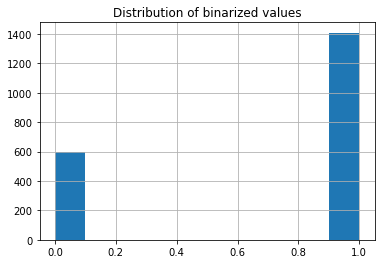

In [8]:
y_train.astype(int).hist()
plt.title("Distribution of binarized values")

In [9]:
external_data_with_preds = pd.concat([external_data, y_cla, y_reg], axis=1)
external_data_with_preds["pred_reg_IC50"] = external_data_with_preds["pred_reg"].apply(lambda x: np.power(10, -x) * 10e9)
external_data_with_preds = external_data_with_preds.sort_values("pred_cla", ascending=False)

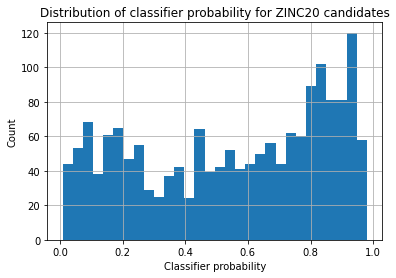

In [19]:
external_data_with_preds["pred_cla"].hist(bins=30)
plt.title("Distribution of classifier probability for ZINC20 candidates")
plt.xlabel("Classifier probability")
plt.ylabel("Count")
plt.savefig(fname="zinc20_classifier_distribution.pdf", format="pdf", dpi=200, bbox_inches='tight')

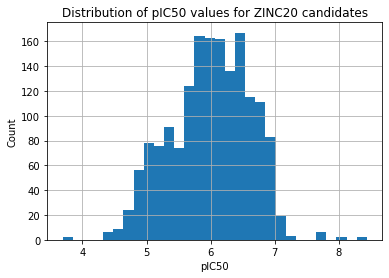

In [20]:
external_data_with_preds["pred_reg"].hist(bins=30)
plt.title("Distribution of pIC50 values for ZINC20 candidates")
plt.xlabel("pIC50")
plt.ylabel("Count")
plt.savefig(fname="zinc20_regressor_distribution.pdf", format="pdf", dpi=200, bbox_inches='tight')


In [28]:
external_data_with_preds

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl,pred_cla,pred_reg,pred_reg_IC50
1080,1975,155262539,0.720000,GEAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccc(C(C)(C)C(N)=O)cc2)cc1,CHEMBL4289622,0.980122,5.781031,1.655652e+04
1001,1956,155262539,0.734694,GEAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccc(C(C)(C)C(N)=O)cc2)cc1,CHEMBL4285485,0.980122,5.781031,1.655652e+04
850,1931,155262539,0.734694,GEAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccc(C(C)(C)C(N)=O)cc2)cc1,CHEMBL4279420,0.980122,5.781031,1.655652e+04
684,1924,155262539,0.750000,GEAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccc(C(C)(C)C(N)=O)cc2)cc1,CHEMBL4277538,0.980122,5.781031,1.655652e+04
446,2074,155262539,0.708333,GEAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccc(C(C)(C)C(N)=O)cc2)cc1,CHEMBL4463098,0.980122,5.781031,1.655652e+04
...,...,...,...,...,...,...,...,...,...
1505,357,1610787336,0.727273,GFAD.fpb,O=C(O)COc1ccc(NS(=O)(=O)c2ccc3c4c(cccc24)C(=O)N3)cc1,CHEMBL3234246,0.009402,4.463428,3.440110e+05
265,691,5136643,0.754717,GIAB.fpb,O=C(Nc1ccc2c(c1)N(S(=O)(=O)c1ccccc1)CCC2)c1ccccc1,CHEMBL3617293,0.009203,5.840750,1.442947e+04
438,2462,76246955,0.708333,EGAD.fpb,COCCCn1ccc(NC(=O)Nc2nc3ccsc3s2)n1,CHEMBL4799590,0.008530,3.690582,2.039004e+06
105,357,828934,0.720000,EFCA.fpb,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)cc3)c3cccc1c23,CHEMBL3234246,0.008414,4.916939,1.210770e+05


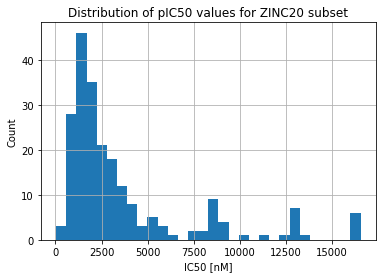

In [32]:
relevant_subset = external_data_with_preds[external_data_with_preds["pred_cla"] > 0.9]
relevant_subset[relevant_subset["pred_reg_IC50"]< 30000]["pred_reg_IC50"].hist(bins=30)
plt.title("Distribution of pIC50 values for ZINC20 subset")
plt.xlabel("IC50 [nM]")
plt.ylabel("Count")
plt.savefig(fname="zinc20_classifier_distribution_subset.pdf", format="pdf", dpi=200, bbox_inches='tight')

In [38]:
print(relevant_subset[relevant_subset["pred_reg_IC50"]< 5000]["pred_reg_IC50"].shape[0]/relevant_subset[relevant_subset["pred_reg_IC50"]< 30000]["pred_reg_IC50"].shape[0])

0.8018433179723502


In [34]:
print(relevant_subset[relevant_subset["pred_reg_IC50"]< 30000]["pred_reg_IC50"].min())
print(relevant_subset[relevant_subset["pred_reg_IC50"]< 30000]["pred_reg_IC50"].max())

36.682449290874565
16556.51976260363


In [ ]:
external_data_with_preds.sort_values("pred_reg_IC50")

In [ ]:
external_data_with_preds.sort_values("pred_reg_IC50")

In [ ]:
external_data_with_preds.to_csv(co.DATA_DIR_CANDIDATES/"search_space_ror_gamma_all_active_predictions_with_chembl.csv", index=False)